In [1]:
!pip install opencv-python matplotlib

In [5]:
import os
import cv2
import numpy as np
import pandas as pd
from google.colab.patches import cv2_imshow

In [6]:
input_folder =  os.path.join("/content/", "Input")
output_folder = os.path.join("/content/", "Output")

In [7]:

class ReadWriteDisplay:
    def __init__(self, image_path):
        self.image_path = image_path

    def read(self, ):
        """ cv2.imread takes a image path to be read"""
        print(self.image_path)
        image = cv2.imread(self.image_path)
        shape = image.shape
        # shape goes by : (rows,cols,channels)
        print("Shape of the image:", shape)

        """ reading image with flags"""
        # cv2.IMREAD_COLOR (default) ,cv2.IMREAD_GRAYSCALE (0) and cv2.IMREAD_UNCHANGED(-1)

        grayscale = cv2.imread(self.image_path, 0)
        # shape goes by : (rows,cols,channels)
        shape = grayscale.shape
        print("Shape of the grayscale image:", shape)

    def write(self):
        image = cv2.imread(self.image_path)
        if image is None:
            sys.exit("Could not read the image.")
        cv2.imwrite(os.path.join(output_folder, "write_output.jpg"), image)

    def show(self):
        image = cv2.imread(self.image_path)
        cv2_imshow(image)
        # if cv2.waitKey(0) & 0xff == 27:
        #     cv2.destroyAllWindows()

In [10]:

class VideoAnalytics:
    def __init__(self, video_path):
        self.video_path = video_path

    def process(self):
        """
        Videocapture takes an video path to be read,
        if we give 0 as an argument, we can directly feed camera input
        """
        cam = cv2.VideoCapture(self.video_path)
        basepath = os.path.join(output_folder, 'data')
        try:
            if not os.path.exists(basepath):
                os.makedirs(basepath)
        except OSError:
            print('Error: Creating directory of data')

        currentframe = 0
        while True:
            # reading one frame at a time,and checkig if ret is True, if False,brak the loop as there are no frame now
            ret, frame = cam.read()
            if ret:
                name = os.path.join(basepath, 'frame' + str(currentframe) + '.jpg')
                print('Creating...' + name)
                cv2.imwrite(name, frame)
                currentframe += 1
            else:
                break

        print("Number of Frames: ", currentframe)
        cam.release()
        cv2.destroyAllWindows()

In [11]:
# video processing
video_path = os.path.join(input_folder, "test_video.mp4")
video_obj = VideoAnalytics(video_path)
video_obj.process()

Creating.../content/Output/data/frame0.jpg
Creating.../content/Output/data/frame1.jpg
Creating.../content/Output/data/frame2.jpg
Creating.../content/Output/data/frame3.jpg
Creating.../content/Output/data/frame4.jpg
Creating.../content/Output/data/frame5.jpg
Creating.../content/Output/data/frame6.jpg
Creating.../content/Output/data/frame7.jpg
Creating.../content/Output/data/frame8.jpg
Creating.../content/Output/data/frame9.jpg
Creating.../content/Output/data/frame10.jpg
Creating.../content/Output/data/frame11.jpg
Creating.../content/Output/data/frame12.jpg
Creating.../content/Output/data/frame13.jpg
Creating.../content/Output/data/frame14.jpg
Creating.../content/Output/data/frame15.jpg
Creating.../content/Output/data/frame16.jpg
Creating.../content/Output/data/frame17.jpg
Creating.../content/Output/data/frame18.jpg
Creating.../content/Output/data/frame19.jpg
Creating.../content/Output/data/frame20.jpg
Creating.../content/Output/data/frame21.jpg
Creating.../content/Output/data/frame22.jp

In [9]:
import cv2 as cv

In [15]:

class CornerDetection:

    def __init__(self, path):
        self.image_path = path

    def detect(self):

        """
        For arguments for cornerHarris:
          img - Input image. It should be grayscale and float32 type.
          blockSize - It is the size of neighbourhood considered for corner detection
          ksize - Aperture parameter of the Sobel derivative used.
          k - Harris detector free parameter in the equation.
        """
        print(self.image_path)
        img = cv.imread(self.image_path)
        gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        gray = np.float32(gray)

        dst = cv.cornerHarris(gray, 2, 3, 0.04)
        # result is dilated for marking the corners, not important
        dst = cv.dilate(dst, None)
        # Threshold for an optimal value, it may vary depending on the image.
        img[dst > 0.01 * dst.max()] = [0, 0, 255]
        cv2.imwrite(os.path.join(output_folder, "cornerHarris.jpg"), img)
        # cv.imshow('dst', img)
        # if cv.waitKey(0) & 0xff == 27:
        #     cv.destroyAllWindows()

In [16]:
# # harris corner detection
image_path_src = os.path.join(input_folder, "test.jpg")
corner_obj = CornerDetection(image_path_src)
corner_obj.detect()

/content/Input/test.jpg


/content/Input/test.jpg
Shape of the image: (280, 390, 3)
Shape of the grayscale image: (280, 390)


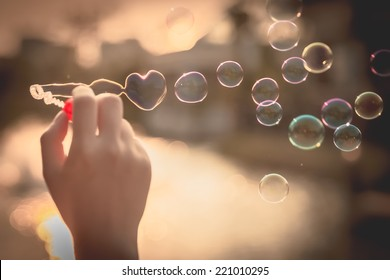

/content/Output/cornerHarris.jpg
Shape of the image: (280, 390, 3)
Shape of the grayscale image: (280, 390)


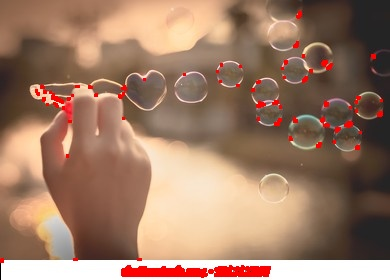

In [17]:
image_path = os.path.join(input_folder, "test.jpg")
read_write_obj = ReadWriteDisplay(image_path)
read_write_obj.read()
read_write_obj.show()

image_path = os.path.join(output_folder, "cornerHarris.jpg")
read_write_obj = ReadWriteDisplay(image_path)
read_write_obj.read()
read_write_obj.show()

In [18]:

class SIFT:
    def __init__(self, path):
        self.image_path = path
        self.image = cv2.imread(self.image_path)

    def drawKeypoints(self):
        gray = cv2.cvtColor(self.image, cv2.COLOR_BGR2GRAY)
        sift = cv2.SIFT_create()
        kp = sift.detect(gray, None)
        img = cv2.drawKeypoints(gray, kp, self.image)
        cv2.imwrite(os.path.join(output_folder, "sift_keypoints.jpg"), img)

    def match(self, image_src, image_dest):
        img1 = cv2.imread(image_src)
        img2 = cv2.imread(image_dest)

        # convert images to grayscale
        img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
        img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

        # create SIFT object
        sift = cv2.xfeatures2d.SIFT_create()
        # detect SIFT features in both images
        keypoints_1, descriptors_1 = sift.detectAndCompute(img1, None)
        keypoints_2, descriptors_2 = sift.detectAndCompute(img2, None)

        # create feature matcher
        bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

        # match descriptors of both images
        matches = bf.match(descriptors_1, descriptors_2)
        matches = sorted(matches, key=lambda x: x.distance)
        # draw first 50 matches
        matched_img = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:150], img2, flags=2)
        # save the image
        cv2.imwrite(os.path.join(output_folder, "matched_imaged.jpg"), matched_img)



In [19]:
# # sift feature detection
image_path_src = os.path.join(input_folder, "test.jpg")
sift_obj = SIFT(image_path_src)
sift_obj.drawKeypoints()
sift_obj.match(image_path_src, image_path_src)

/content/Input/test.jpg
Shape of the image: (280, 390, 3)
Shape of the grayscale image: (280, 390)


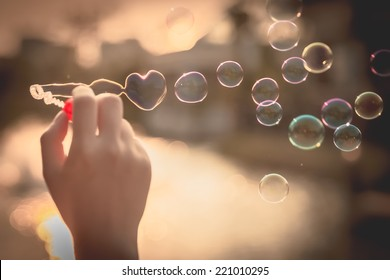

/content/Output/sift_keypoints.jpg
Shape of the image: (280, 390, 3)
Shape of the grayscale image: (280, 390)


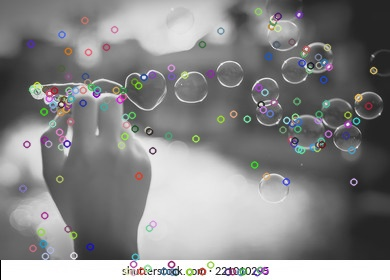

/content/Output/matched_imaged.jpg
Shape of the image: (280, 780, 3)
Shape of the grayscale image: (280, 780)


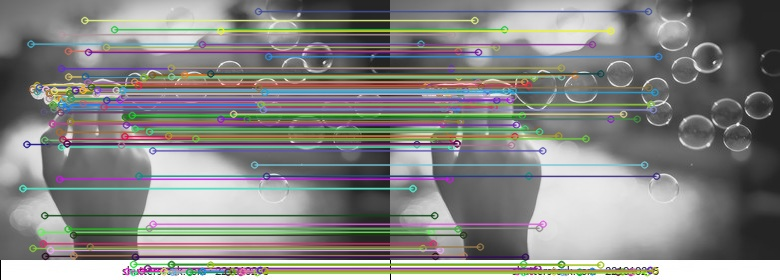

In [20]:
image_path = os.path.join(input_folder, "test.jpg")
read_write_obj = ReadWriteDisplay(image_path)
read_write_obj.read()
read_write_obj.show()

image_path = os.path.join(output_folder, "sift_keypoints.jpg")
read_write_obj = ReadWriteDisplay(image_path)
read_write_obj.read()
read_write_obj.show()

image_path = os.path.join(output_folder, "matched_imaged.jpg")
read_write_obj = ReadWriteDisplay(image_path)
read_write_obj.read()
read_write_obj.show()

In [23]:
from matplotlib import pyplot as plt

class Matcher:
    def __init__(self, path01, path02):
        self.image_path_src = path01
        self.image_path_dest = path02

    def brute_force_matcher(self):
        """Brute-Force Matching with ORB Descriptors"""

        img1 = cv2.imread(self.image_path_src, cv2.IMREAD_GRAYSCALE)
        img2 = cv2.imread(self.image_path_dest, cv2.IMREAD_GRAYSCALE)  #

        # Initiate ORB detector
        orb = cv2.ORB_create()
        # find the keypoints and descriptors with ORB
        kp1, des1 = orb.detectAndCompute(img1, None)
        kp2, des2 = orb.detectAndCompute(img2, None)

        # create BFMatcher object
        bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
        # Match descriptors.
        matches = bf.match(des1, des2)
        # Sort them in the order of their distance.
        matches = sorted(matches, key=lambda x: x.distance)
        # Draw first 10 matches.
        img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None,
                               flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
        plt.imshow(img3)
        plt.show()

    def flann_matcher(self):

        img1 = cv2.imread(self.image_path_src, cv2.IMREAD_GRAYSCALE)
        img2 = cv2.imread(self.image_path_dest, cv2.IMREAD_GRAYSCALE)

        # Initiate SIFT detector
        sift = cv2.SIFT_create()
        # find the keypoints and descriptors with SIFT
        kp1, des1 = sift.detectAndCompute(img1, None)
        kp2, des2 = sift.detectAndCompute(img2, None)

        # FLANN parameters
        FLANN_INDEX_KDTREE = 1
        index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
        search_params = dict(checks=50)
        flann = cv2.FlannBasedMatcher(index_params, search_params)
        matches = flann.knnMatch(des1, des2, k=2)

        # Need to draw only good matches, so create a mask
        matchesMask = [[0, 0] for i in range(len(matches))]
        for i, (m, n) in enumerate(matches):
            if m.distance < 0.7 * n.distance:
                matchesMask[i] = [1, 0]
        draw_params = dict(matchColor=(0, 255, 0),
                           singlePointColor=(255, 0, 0),
                           matchesMask=matchesMask,
                           flags=cv2.DrawMatchesFlags_DEFAULT)
        img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, matches, None, **draw_params)
        plt.imshow(img3, )
        plt.show()


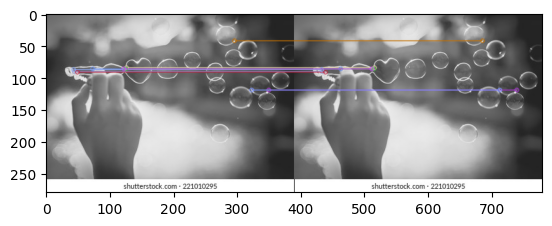

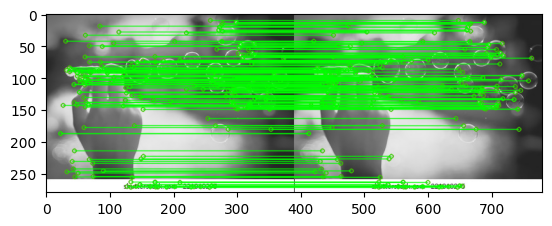

In [24]:
# # feature matching using flann and brute-force orb
image_path_src = os.path.join(input_folder, "test.jpg")
image_path_dest = os.path.join(input_folder, "test.jpg")
matcher_obj = Matcher(image_path_src, image_path_dest)
matcher_obj.brute_force_matcher()
matcher_obj.flann_matcher()